In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', )
combined_data_df.head()


# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [41]:
# Checking the number of mice.

combined_data_df["Mouse ID"].nunique()



249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
                            
duplicate_mouse_ID = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data_df[combined_data_df["Mouse ID"]=="g989"]


#remove_duplicate_mouse_ID = combined_data_df.drop_duplicates(["Mouse ID", "Timepoint"])
#remove_duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data_df[combined_data_df["Mouse ID"]!="g989"]


In [45]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


# ?????? VARIANCE, STDev, SEM NOT WORKING

tumor_volume_gp = clean_df.groupby("Drug Regimen")
mean = tumor_volume_gp['Tumor Volume (mm3)'].mean()
print(f"Mean tumor volume per drug regimen: " + str(mean))

median = tumor_volume_gp['Tumor Volume (mm3)'].median()
print(f"Median tumor volume per drug regimen: " + str(median))

# tumorvolume = clean_df['Tumor Volume (mm3)']
# variance = np.var(tumorvolume,ddof = 0)
# print(f"Variance in tumor volume is {var_numpy}")

# stdv = np.std(tumorvolume,ddof = 0)
# print(f"Standard dev in tumor volume is {sd_numpy}")

# sem = st.sem(tumorvolume,ddof = 0)
# print(f"SEM in tumor volume is {sem_scipy}")


# subset = 'Tumor Volume (mm3)'.iloc[range(30,60)]
# sample = fuel_economy.sample(50)
# print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

Mean tumor volume per drug regimen: Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Median tumor volume per drug regimen: Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [54]:


clean = clean_df.groupby("Drug Regimen")
sumtumvol = clean["Tumor Volume (mm3)"].describe()
tumsem = clean["Tumor Volume (mm3)"].sem


In [56]:
# sumtumvol = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
# sumtumvol

# sumtumvol = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv})
# sumtumvol

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Amount')

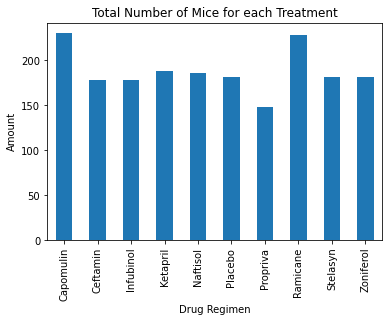

In [80]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

data_plot = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_plot.plot.bar()

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount")


<function matplotlib.pyplot.legend(*args, **kwargs)>

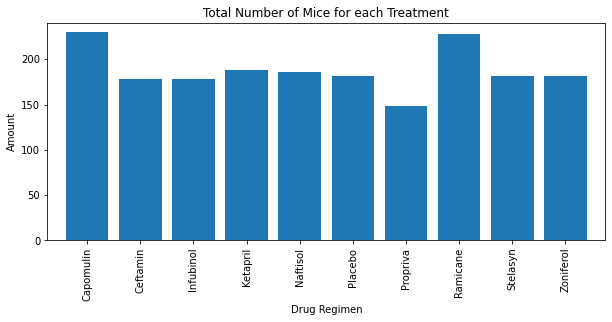

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(data_plot))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, data_plot, alpha=1, align='center')
plt.xticks(tick_locations, data_plot.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_plot)+10)

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount")
plt.legend

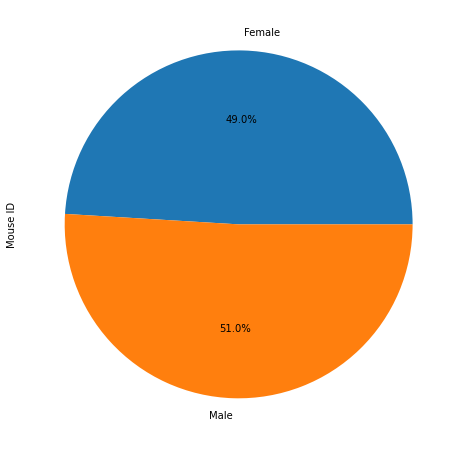

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf = clean_df.groupby(["Sex"]).count()["Mouse ID"]
mf
mf_pie = mf.plot.pie(y="Total Count", autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x1fa0803fa60>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

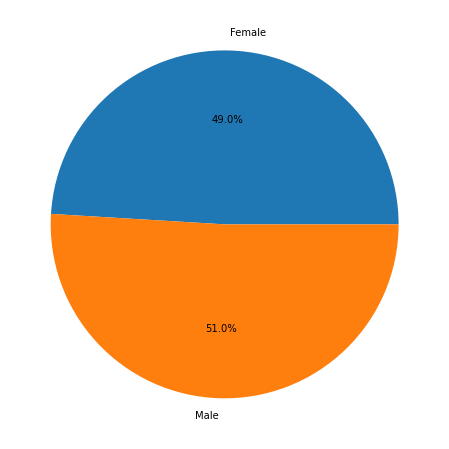

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mf, labels=mf.index.values, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

endtime = clean_df.groupby("Mouse ID").max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint






<bound method GroupBy.max of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001FA07FDE4C0>>

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
